In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] =10,6


In [2]:
dataset = pd.read_excel('ImportExportData.xlsx',sheet_name='Sheet2')
ied = dataset
print(dataset)
locationAmnth =dataset.iloc[:, :]
print(locationAmnth)
locationAmnth['Month'] = pd.to_datetime(locationAmnth['Month'], infer_datetime_format=True)
indexedDataset = locationAmnth.set_index(['Month'])

        Month  Import
0  2018-01-01       6
1  2018-02-01      16
2  2018-03-01      94
3  2018-04-01     119
4  2018-05-01     198
5  2018-06-01      11
6  2018-07-01      52
7  2018-08-01     154
8  2018-09-01      88
9  2018-10-01     160
10 2018-11-01     160
11 2018-12-01     206
12 2019-01-01     137
13 2019-02-01      94
14 2019-03-01     130
15 2019-04-01     133
16 2019-05-01     118
17 2019-06-01     136
18 2019-07-01     200
19 2019-08-01     223
20 2019-09-01     132
21 2019-10-01     258
22 2019-11-01     225
23 2019-12-01     339
        Month  Import
0  2018-01-01       6
1  2018-02-01      16
2  2018-03-01      94
3  2018-04-01     119
4  2018-05-01     198
5  2018-06-01      11
6  2018-07-01      52
7  2018-08-01     154
8  2018-09-01      88
9  2018-10-01     160
10 2018-11-01     160
11 2018-12-01     206
12 2019-01-01     137
13 2019-02-01      94
14 2019-03-01     130
15 2019-04-01     133
16 2019-05-01     118
17 2019-06-01     136
18 2019-07-01     200
19 2019-08

In [3]:
from datetime import datetime
indexedDataset.tail(5)

,Import
Month,
2019-08-01,223
2019-09-01,132
2019-10-01,258
2019-11-01,225
2019-12-01,339


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


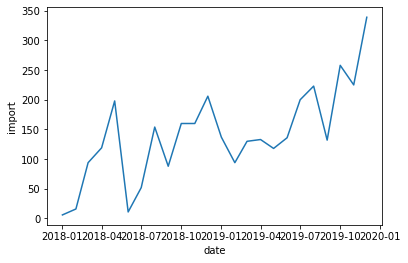

In [4]:
plt.xlabel('date')
plt.ylabel('import')
plt.plot(indexedDataset)

In [5]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                Import
Month                 
2018-01-01         NaN
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01  105.333333
2019-01-01  116.250000
2019-02-01  122.750000
2019-03-01  125.750000
2019-04-01  126.916667
2019-05-01  120.250000
2019-06-01  130.666667
2019-07-01  143.000000
2019-08-01  148.750000
2019-09-01  152.416667
2019-10-01  160.583333
2019-11-01  166.000000
2019-12-01  177.083333                Import
Month                
2018-01-01        NaN
2018-02-01        NaN
2018-03-01        NaN
2018-04-01        NaN
2018-05-01        NaN
2018-06-01        NaN
2018-07-01        NaN
2018-08-01        NaN
2018-09-01        NaN
2018-10-01        NaN
2018-11-01        NaN
2018-12-01  72.156816
2019-01-01  65.350976
2019-02-01  57.931190
2019-03-01  57.234962
2019-04-01  57.227550
2019-0

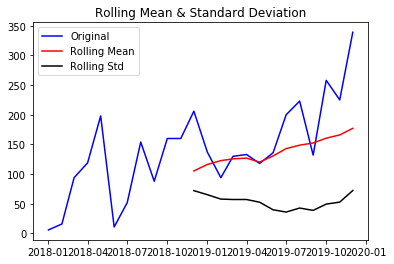

In [6]:
#plot rollling statistics
orig = plt.plot(indexedDataset, color='blue', label = 'Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [7]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['Import'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)



Results of Dickey Fuller Test:
Test Statistics                 1.979116
p-value                         0.998645
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


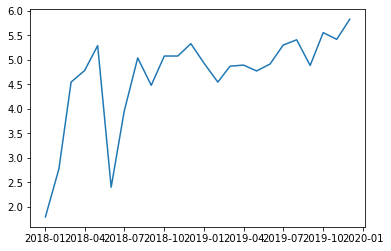

In [8]:
#Estimating Trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


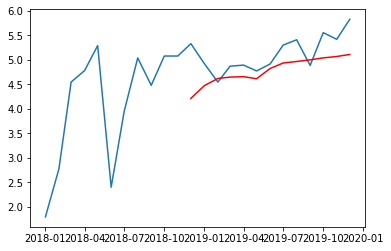

In [9]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

#time series still not stationary

In [10]:
datasetlogScaleandMovingAverage = indexedDataset_logScale - movingAverage
datasetlogScaleandMovingAverage.head(12)

datasetlogScaleandMovingAverage.dropna(inplace=True)
datasetlogScaleandMovingAverage.head(10)

,Import
Month,
2018-12-01,1.118152
2019-01-01,0.449572
2019-02-01,-0.074673
2019-03-01,0.222547
2019-04-01,0.236093
2019-05-01,0.159560
2019-06-01,0.091967
2019-07-01,0.365373
2019-08-01,0.443376


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Import'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
    

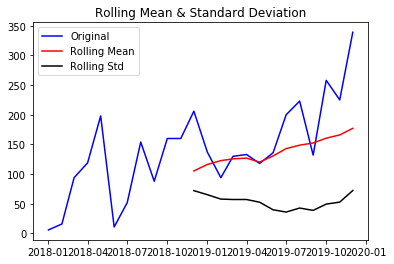

Results of Dickey Fuller Test:
Test Statistics                 1.979116
p-value                         0.998645
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [12]:
test_stationarity(datasetlogScaleandMovingAverage)

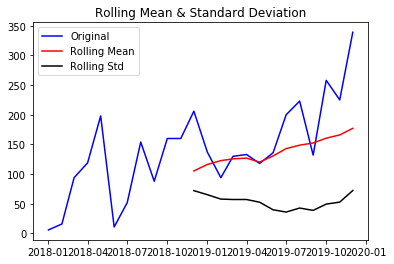

Results of Dickey Fuller Test:
Test Statistics                 1.979116
p-value                         0.998645
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rollling statistics
    orig = plt.plot(indexedDataset, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(indexedDataset['Import'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value','#Lags Used', 'Number of Observations Used' ])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    
test_stationarity(datasetlogScaleandMovingAverage)    

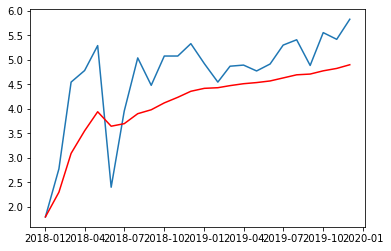

In [14]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

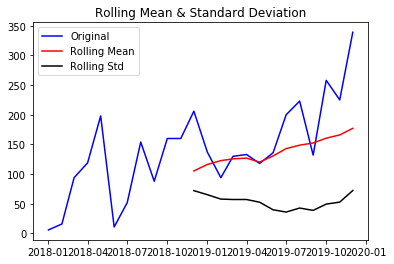

Results of Dickey Fuller Test:
Test Statistics                 1.979116
p-value                         0.998645
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [15]:
datasetlogScaleandMovingexponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetlogScaleandMovingexponentialDecayAverage)

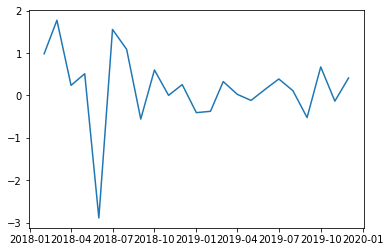

In [16]:
datasetlogOffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetlogOffShifting)

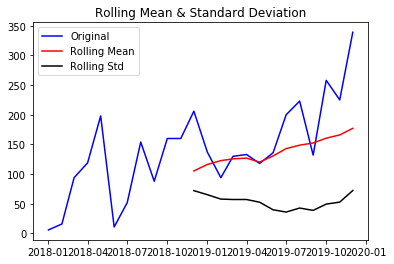

Results of Dickey Fuller Test:
Test Statistics                 1.979116
p-value                         0.998645
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [17]:
datasetlogOffShifting.dropna(inplace=True)
test_stationarity(datasetlogOffShifting)

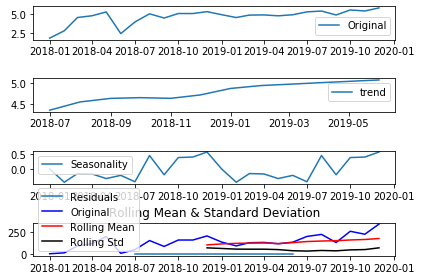

Results of Dickey Fuller Test:
Test Statistics                 1.979116
p-value                         0.998645
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [18]:
#components of timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid


plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

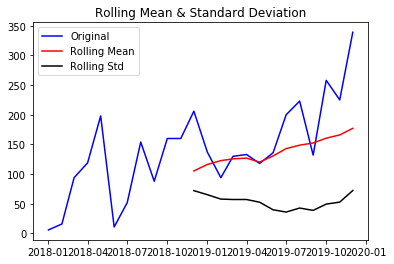

Results of Dickey Fuller Test:
Test Statistics                 1.979116
p-value                         0.998645
#Lags Used                      9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [19]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


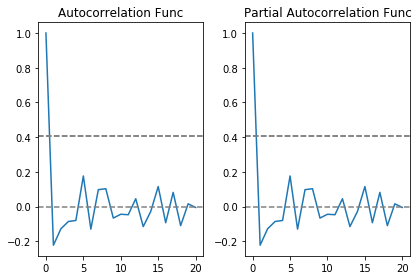

In [20]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogOffShifting, nlags=20)
lag_pacf = pacf(datasetlogOffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Func')

#Plot PACF
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogOffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Func')
plt.tight_layout()
                          
                          

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


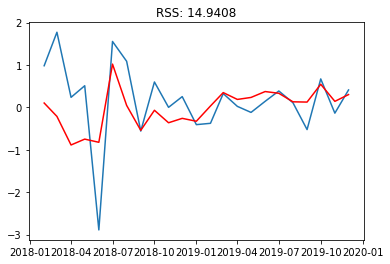

In [30]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model=ARIMA(indexedDataset_logScale, order=(1,1,1))
results_AR = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogOffShifting['Import'])**2))
print('Plotting AR Model')

Plotting AR Model


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


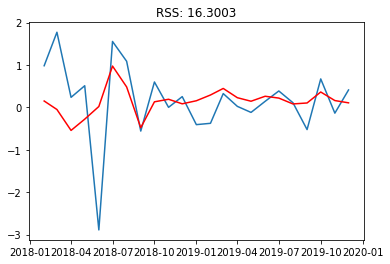

In [31]:
#MA MODEL
model=ARIMA(indexedDataset_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetlogOffShifting['Import'])**2))
print('Plotting AR Model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 14.6898')

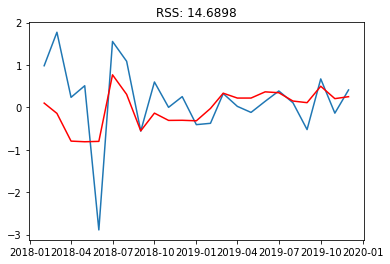

In [32]:
model=ARIMA(indexedDataset_logScale, order=(0,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogOffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogOffShifting['Import'])**2))


In [33]:
pridictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pridictions_ARIMA_diff.head())

Month
2018-02-01    0.099835
2018-03-01   -0.142767
2018-04-01   -0.796287
2018-05-01   -0.811494
2018-06-01   -0.802660
dtype: float64


In [34]:
#Convert to Cummulative Sum
pridictions_ARIMA_diff_cumsum = pridictions_ARIMA_diff.cumsum()
print(pridictions_ARIMA_diff_cumsum.head())

Month
2018-02-01    0.099835
2018-03-01   -0.042932
2018-04-01   -0.839219
2018-05-01   -1.650713
2018-06-01   -2.453373
dtype: float64


In [35]:
pridictions_ARIMA_log = pd.Series(indexedDataset_logScale['Import'].ix[0], index= indexedDataset_logScale.index)
pridictions_ARIMA_log = pridictions_ARIMA_log.add(pridictions_ARIMA_diff_cumsum, fill_value=0)
pridictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
2018-01-01    1.791759
2018-02-01    1.891595
2018-03-01    1.748827
2018-04-01    0.952541
2018-05-01    0.141047
dtype: float64

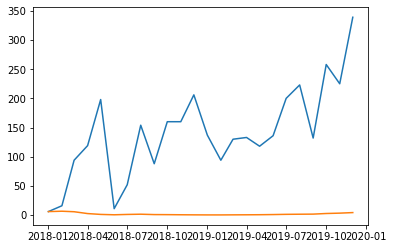

In [36]:
pridictions_ARIMA = np.exp(pridictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(pridictions_ARIMA)

In [37]:
indexedDataset_logScale

,Import
Month,
2018-01-01,1.791759
2018-02-01,2.772589
2018-03-01,4.543295
2018-04-01,4.779123
2018-05-01,5.288267
2018-06-01,2.397895
2018-07-01,3.951244
2018-08-01,5.036953
2018-09-01,4.477337


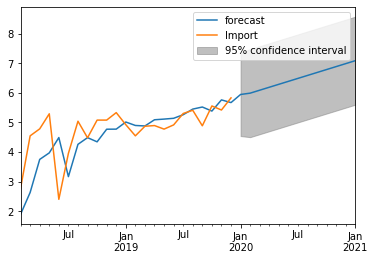

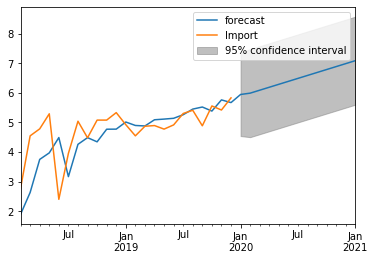

In [38]:
results_ARIMA.plot_predict(1,36)



In [39]:
results_ARIMA.forecast(steps=12)

(array([5.94095131, 5.98561532, 6.08545056, 6.18528581, 6.28512106,
        6.38495631, 6.48479155, 6.5846268 , 6.68446205, 6.7842973 ,
        6.88413254, 6.98396779]),
 array([0.71670275, 0.75874121, 0.75874122, 0.75874122, 0.75874123,
        0.75874123, 0.75874124, 0.75874124, 0.75874125, 0.75874125,
        0.75874126, 0.75874126]),
 array([[4.53623973, 7.3456629 ],
        [4.49850987, 7.47272076],
        [4.5983451 , 7.57255602],
        [4.69818034, 7.67239128],
        [4.79801558, 7.77222654],
        [4.89785082, 7.87206179],
        [4.99768605, 7.97189705],
        [5.09752129, 8.07173231],
        [5.19735653, 8.17156757],
        [5.29719177, 8.27140283],
        [5.397027  , 8.37123808],
        [5.49686224, 8.47107334]]))

In [40]:
x=results_ARIMA.forecast(steps=12)
print(x[0])


[5.94095131 5.98561532 6.08545056 6.18528581 6.28512106 6.38495631
 6.48479155 6.5846268  6.68446205 6.7842973  6.88413254 6.98396779]


In [41]:
print(np.exp(x[0]))

[ 380.2965387   397.66713676  439.41775347  485.55171955  536.52923783
  592.8588273   655.10239578  723.88084515  799.88026505  883.8587769
  976.65409641 1079.19189012]
